In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
import lxml
import os
import urllib
import sys
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import csv
import multiprocessing
import matplotlib.pyplot as plt
# importing built in linear regression model
from sklearn.linear_model import LinearRegression
import cv2 as cv
# np.set_printoptions(threshold=1000)

In [24]:
# Fuction to apply FFT
def fft_image(img):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x, y = np.meshgrid(range(img.shape[0]), range(img.shape[1]))
    r = np.sqrt((x - x.mean())**2 + (y - y.mean())**2)
    # Compute the 2D FFT of the grayscale image
    img_fft = np.fft.fft2(img_gray)
    # Shift the zero-frequency component to the center of the spectrum
    img_fft_shift = np.where((r>0)&(r<16), np.fft.fftshift(img_fft), 0)
    # Sort frequencies
#     fft_sorted = np.sort(img_fft.flatten())[::-1]
    # Compute the magnitude spectrum
    img_mag = np.abs(img_fft_shift)
#     img_mag = img_fft_shift.real
#     img_mag = np.abs(fft_sorted)
    return img_mag

In [25]:
x_train = np.load('../input/reducing-image-sizes-to-32x32/X_train.npy')
x_test = np.load('../input/reducing-image-sizes-to-32x32/X_test.npy')
y_train = np.load('../input/reducing-image-sizes-to-32x32/y_train.npy')

# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

In [26]:
# Compute the FFT of each image and use the resulting frequency magnitude values as features
X = []
for img in x_train: #images - dataset name
    img_fft = fft_image(img).flatten()
    X.append(img_fft)

# Convert the feature matrix to a numpy array
X = np.array(X)
print(X[0])
# X[:, :256] = 0 
# X[:, -256:] = 0 

[0. 0. 0. ... 0. 0. 0.]


In [27]:
# Create a linear regression model and fit it to the dataset
reg = LinearRegression()
reg.fit(X, y_train)

LinearRegression()

In [28]:
# Predict the labels for a new set of images
X_new = []
for img in x_test: #test_images:
    img_fft = fft_image(img).flatten()
    X_new.append(img_fft)

X_new = np.array(X_new)
# X_new[:, :256] = 0 
# X_new[:, -256:] = 0 
y_pred = reg.predict(X_new)

In [29]:
temp = np.zeros(y_pred.shape)
for i in range (len(y_pred)):
    max_index = y_pred[i].argmax()
    temp[i][max_index] = 1
    i
# print(temp)
# print(len(temp))
# print(len(y_pred))

In [30]:
# label_df = pd.read_csv('/kaggle/input/iwildcam-2019-fgvc6/train.csv')
# # print(label_df['category_id'])
# count = []
# for i in range (0,23):
#     count_each = np.count_nonzero(label_df['category_id'] == i)
#     count.append(count_each)
# count = np.array(count)
# print(count)


In [22]:
# y_pred_df = pd.DataFrame(temp)
# pred_category_names = pd.Series(y_pred_df.columns)

# # get the index of the maximum value for each row in the one-hot encoded dataframe
# max_index_pred = y_pred_df.idxmax(axis=1)

# # use the index to look up the category names in the series
# pred_categories = pred_category_names[max_index_pred]
# print(category_names)

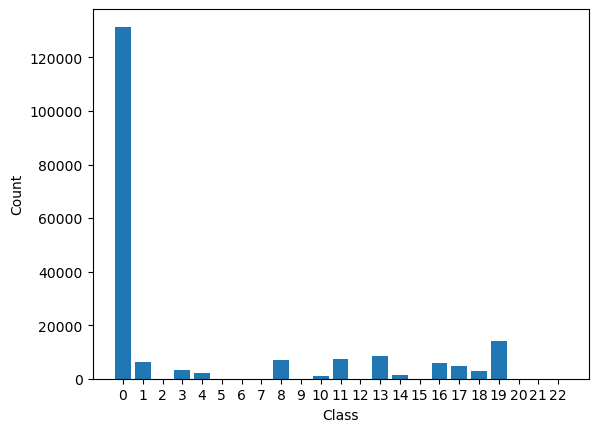

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
dtype: int64


In [38]:
# y_train_labels = np.argmax(y_train, axis=1)

class_counts_np = np.array(label_df['category_id'])
class_counts = np.bincount(class_counts_np)

plt.bar(np.arange(len(class_counts)), class_counts)
plt.xticks(np.arange(len(class_counts)))
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# print(len(class_counts))

# y_train_df = pd.DataFrame(y_train)
# category_names = pd.Series(y_train_df.columns)

# # get the index of the maximum value for each row in the one-hot encoded dataframe
# max_index = y_train_df.idxmax(axis=1)

# # use the index to look up the category names in the series
# original_categories = category_names[max_index]
# # print(category_names)

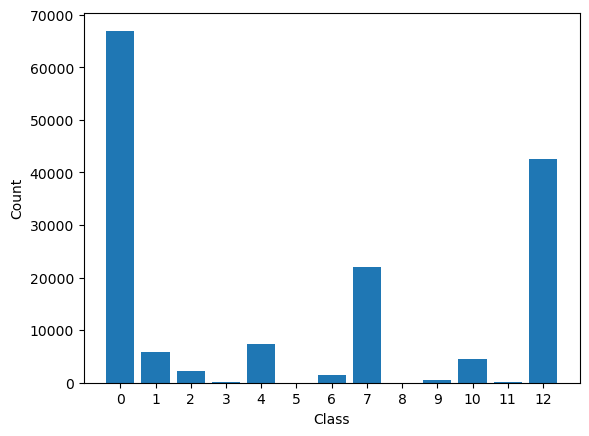

13


In [31]:
y_pred_labels = np.argmax(temp, axis=1)

# Count the frequency of each class
class_counts = np.bincount(y_pred_labels)

plt.bar(np.arange(len(class_counts)), class_counts)
plt.xticks(np.arange(len(class_counts)))
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print(len(class_counts))

In [59]:
# np.set_printoptions(threshold = 1000)
# print(y_pred_labels)

[12  0  4 ...  0  0  0]


In [14]:
# from sklearn.metrics import mean_squared_error, r2_score

# mse = mean_squared_error(y_test, y_pred_labels)
# r2 = r2_score(y_test, y_pred_labels)

# # print the results
# print("Mean squared error: %.2f" % mse)
# print("R-squared: %.2f" % r2)

Mean squared error: 51.44
R-squared: 0.00


In [16]:
# f1 = f1_score(y_test, y_pred_labels, average='weighted')
# print(f1)

0.6067609207902845


In [32]:
filenames = pd.read_csv('/kaggle/input/iwildcam-2019-fgvc6/test.csv')
# filenames = np.array(filenames)
print(filenames['id'])

0         bce932f6-2bf6-11e9-bcad-06f10d5896c4
1         bce932f7-2bf6-11e9-bcad-06f10d5896c4
2         bce932f8-2bf6-11e9-bcad-06f10d5896c4
3         bce932f9-2bf6-11e9-bcad-06f10d5896c4
4         bce932fa-2bf6-11e9-bcad-06f10d5896c4
                          ...                 
153725    88613521-2c22-11e9-bcad-06f10d5896c4
153726    88613522-2c22-11e9-bcad-06f10d5896c4
153727    88613523-2c22-11e9-bcad-06f10d5896c4
153728    88613524-2c22-11e9-bcad-06f10d5896c4
153729    89994900-2c22-11e9-bcad-06f10d5896c4
Name: id, Length: 153730, dtype: object


In [33]:
file_names = filenames['id']

# Open a new CSV file for writing
with open('predictions_new.csv', 'w', newline='') as csvfile:
    # Create a writer object
    csvwriter = csv.writer(csvfile)

    # Write the header row
    csvwriter.writerow(['ID', 'Predicted'])

    # Write the data rows
    for i in range(len(file_names)):
        csvwriter.writerow([file_names[i], y_pred_labels[i]])